In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import qiskit
from qiskit import IBMQ, QuantumCircuit, execute, transpile, assemble, Aer, ClassicalRegister, QuantumRegister
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.tools.monitor import job_monitor

In [3]:
#The quantum strategy is given by the presentation

In [4]:
# Functions used in the demo

# U and V are circuit components that represent observables, i.e. the strategy.
def U(t):
    qc_U = QuantumCircuit(1)
    if t == 0:
        qc_U
    elif t == 1:
        qc_U.ry(4*np.pi/5, 0)
    elif t == 2:
        qc_U.ry(8*np.pi/5, 0)
    elif t == 3:
        qc_U.ry(2*np.pi/5, 0)
    elif t == 4:
        qc_U.ry(6*np.pi/5, 0)
    return qc_U


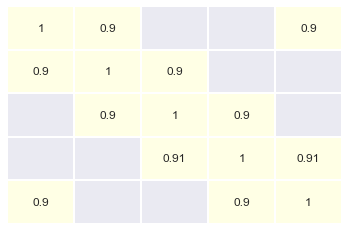

In [5]:
#Run on a simulator

#Simulation for all cases

index = [[0,0], [0,1], [0,4], [1,1], [1,2], [1,0], [2,2], 
         [2,3], [2,1], [3,3], [3,4], [3,2], [4,4], [4,0], [4,3]]
Nshots = 1024*10 #number of shots

for i in range(15):
    # Generate two Bell states
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    
    qc1 = qc.compose(U(index[i][0]))
    qc_ob = qc1.compose(U(index[i][1]), qubits=[1])
   
    for l in range(2):
        qc_ob.barrier()
        qc_ob.measure(l,l)
        
    simulator = Aer.get_backend('qasm_simulator') #you can also use other simulators. ex) 'statevector_simulator', 'aer_simulator'
    mapped_qc_ob = transpile(qc_ob, backend=simulator)
    qobj = assemble(mapped_qc_ob, backend=simulator, shots=Nshots, memory=True)
    job = simulator.run(qobj)
    
    q01_post = job.result().get_memory()
    
    if index[i][0] == index[i][1]:
        win_st = [k for k in q01_post if k[0] == k[1]]        
        win_prob = len(win_st)/Nshots
    else:
        win_st = [k for k in q01_post if k[0] != k[1]]
        win_prob = len(win_st)/Nshots

    prob_table = np.zeros((5,5))
    mask = np.ones((5,5))
    
    prob_table[index[i][0]][index[i][1]] = win_prob
    mask[index[i][0]][index[i][1]] = 0
            
    #Visualize a numpy array in python using seaborn        
    ax = sns.heatmap(prob_table, cmap="YlGn", mask=mask, linewidths=.10, center=2, annot=True, cbar=None, xticklabels=False, yticklabels=False)     

In [6]:
from qiskit import IBMQ
IBMQ.enable_account('8ba2543d39b8295256079c0e8bfcfdb130e2b49a5734ecb4f094d05edb25994cbb8124761d627575f10165b1c12b2c90d25537427879ce1431eb11fad2a46ac0')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
#IBMQ.providers()

In [8]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')

In [9]:
#provider.backends()

In [10]:
backend = provider.get_backend('ibm_lagos')

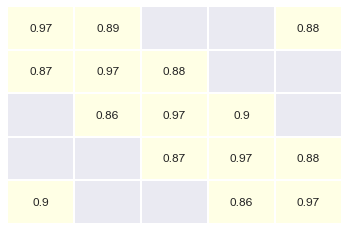

In [14]:
#Run on a real backend ('ibmq_')

# Simulation for all cases

index = [[0,0], [0,1], [0,4], [1,1], [1,2], [1,0], [2,2], 
         [2,3], [2,1], [3,3], [3,4], [3,2], [4,4], [4,0], [4,3]]
Nshots = 1024*5 #number of shots

for i in range(15):
    # Generate two Bell states
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    
    qc1 = qc.compose(U(index[i][0]))
    qc_ob = qc1.compose(U(index[i][1]), qubits=[1])
   
    for l in range(2):
        qc_ob.barrier()
        qc_ob.measure(l,l)
        
    mapped_qc_ob = transpile(qc_ob, backend=backend)
    qobj = assemble(mapped_qc_ob, backend=backend, shots=Nshots ,memory=True)
    job = backend.run(qobj)
    
    q01_post = job.result().get_memory(qc_ob)
    
    if index[i][0] == index[i][1]:
        win_st = [k for k in q01_post if k[0] == k[1]]        
        win_prob = len(win_st)/Nshots
    else:
        win_st = [k for k in q01_post if k[0] != k[1]]
        win_prob = len(win_st)/Nshots

    prob_table = np.zeros((5,5))
    mask = np.ones((5,5))
    
    prob_table[index[i][0]][index[i][1]] = win_prob
    mask[index[i][0]][index[i][1]] = 0
            
    #Visualize (plot) a numpy array in python using seaborn        
    ax = sns.heatmap(prob_table, cmap="YlGn", mask=mask, linewidths=.10, center=2, annot=True, cbar=None, xticklabels=False, yticklabels=False)     